In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [5]:
df_train.dtypes

survived                int64
sex                    object
age                   float64
n_siblings_spouses      int64
parch                   int64
fare                  float64
class                  object
deck                   object
embark_town            object
alone                  object
dtype: object

In [6]:
df_train['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

In [7]:
df_train.columns

Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [8]:
df_train.pop('n_siblings_spouses')

0      1
1      1
2      0
3      1
4      0
      ..
622    0
623    0
624    0
625    1
626    0
Name: n_siblings_spouses, Length: 627, dtype: int64

In [9]:
df_train.columns

Index(['survived', 'sex', 'age', 'parch', 'fare', 'class', 'deck',
       'embark_town', 'alone'],
      dtype='object')

In [10]:
df_train.describe()

,survived,age,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.379585,34.385399
std,0.487582,12.511818,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,15.045800
75%,1.000000,35.000000,0.000000,31.387500
max,1.000000,80.000000,5.000000,512.329200


In [11]:
df_train.isna().sum()

survived       0
sex            0
age            0
parch          0
fare           0
class          0
deck           0
embark_town    0
alone          0
dtype: int64

In [12]:
df_train.shape

(627, 9)

#EDA

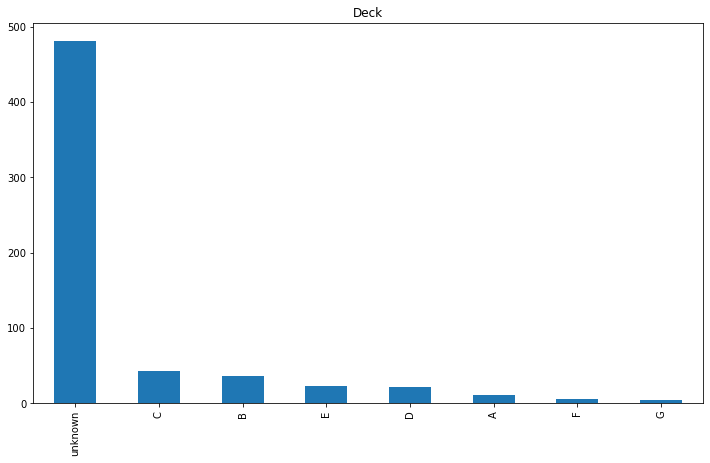

In [13]:
plt.figure(figsize=(12,7))
df_train['deck'].value_counts().plot.bar()
plt.title('Deck')
plt.show()

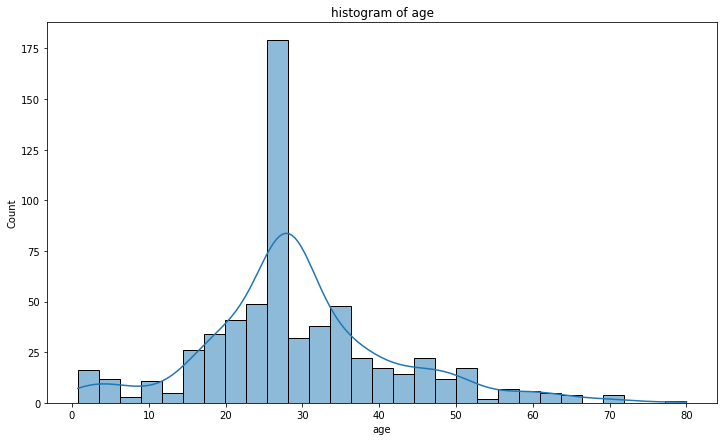

In [14]:
plt.figure(figsize=(12,7))
sns.histplot(df_train['age'],kde=True)
plt.title("histogram of age")
plt.show()

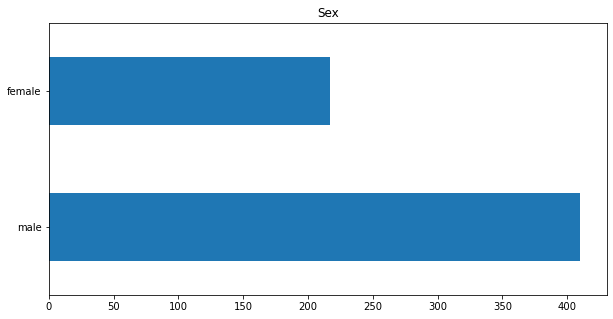

In [15]:
plt.figure(figsize=(10,5))
df_train['sex'].value_counts().plot.barh()
plt.title('Sex')
plt.show()

In [18]:
df_survived = df_train[df_train['survived']==1]

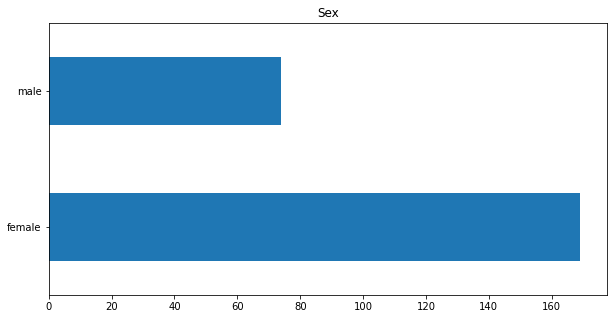

In [19]:
plt.figure(figsize=(10,5))
df_survived['sex'].value_counts().plot.barh()
plt.title('Sex')
plt.show()

In [26]:
val = list(df_train['sex'].unique())

In [28]:
for i in val:
    percen = df_survived[df_survived['sex']==i]['sex'].count()/df_train[df_train['sex']==i]['sex'].count()
    print(f'{i} percentage survived = {percen}')

male percentage survived = 0.18048780487804877
female percentage survived = 0.7788018433179723
